In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [2]:
image = cv2.imread("data/PSF0001_14a.tif", cv2.IMREAD_GRAYSCALE)

In [ ]:
edges = cv2.Canny(image, threshold1=50, threshold2=150)

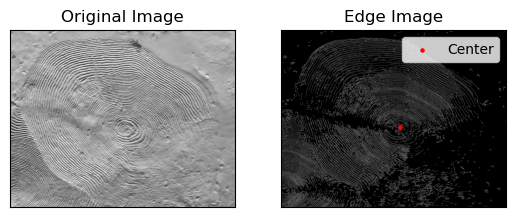

In [16]:
x_c, y_c = 1300, 1050 # Center of the scale - get this programatically

plt.subplot(121),plt.imshow(image,cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(edges,cmap = 'gray')
plt.scatter([x_c], [y_c], color='red', s=5, label='Center')  # Red dot for center
plt.title('Edge Image')
plt.xticks([]), plt.yticks([])
plt.legend()
 
plt.show()

In [17]:
# Step 4: Calculate distances to edges
edge_points = np.column_stack(np.where(edges > 0))
center = np.array([x_c, y_c])
distances = np.linalg.norm(edge_points - center, axis=1)
max_distance = np.max(distances)
longest_edge_point = edge_points[np.argmax(distances)]

# Step 5: Crop along the transect
line_start = (int(x_c), int(y_c))
line_end = (int(longest_edge_point[1]), int(longest_edge_point[0]))

# Debugging: Draw the line
image_with_line = cv2.line(image.copy(), line_start, line_end, (255, 0, 0), 2)

# Save and display results
cv2.imwrite("longest_transect.png", image_with_line)
cv2.imshow("Longest Transect", image_with_line)
cv2.waitKey(0)
cv2.destroyAllWindows()